In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os #para obtener las rutas (path) 
import numpy as np
from imblearn.over_sampling import SMOTE  # Equilibar el dataset
import pickle  
import warnings
warnings.simplefilter("ignore")

In [2]:
#cargamos los datos
tweets_depresivos_df = pd.DataFrame(pd.read_excel("../2.Preprocesamiento/Dataset_depresivo_Limpio.xlsx")) 
tweets_depresivos_df['sentimiento'] = 1 #tweets depresivos clasificados con 1

tweets_random_df = pd.DataFrame(pd.read_excel("../2.Preprocesamiento/Dataset_random_Limpio.xlsx")) 
tweets_random_df['sentimiento'] = 0 #tweets depresivos clasificados con 0
#unimos ambos datasets y solo con conservamos las caracteristicas que vamos a usar 
tweet_data_df = pd.concat([tweets_depresivos_df, tweets_random_df]).reset_index()[["tweet_token", "sentimiento"]]
#mezclamos los datos
tweet_data_df = tweet_data_df.sample(frac=1).reset_index()[["tweet_token", "sentimiento"]]
tweet_data_df

,tweet_token,sentimiento
0,"['gym', 'deber', 'ayudar', 'matar', 'ansiedad']",0
1,"['seguro', 'mismo']",0
2,"['depresion', 'baja', 'autoestima', 'boomerong...",1
3,"['hacer', 'no', 'pasar', 'dias', 'entero', 'de...",1
4,"['gente', 'desesperado', 'trabajar', 'hacer', ...",0
...,...,...
10709,"['yo', 'comi', 'turron', 'macadamia', 'chocola...",0
10710,"['perdi', 'audifono', 'yahora', 'chismeo', 'yo...",0
10711,"['yo', 'dar', 'muerte', 'blanco', 'mezclar', '...",0
10712,"['slds', 'ayudar', 'favor', 'respuesta', 'comp...",0


In [3]:
#guardamos el dataset solo son los datos a usar para la extraccion de caracteristicas y el entrenamiento
path = os.path.normpath(os.getcwd() + os.sep + os.pardir)
tweet_data_df.to_excel(path+"/Dataset_unido.xlsx", index=False)

In [2]:
#path = os.path.normpath(os.getcwd() + os.sep + os.pardir)
#tweet_data_df = pd.DataFrame(pd.read_excel(path+"/Dataset_unido.xlsx")) 

In [2]:
#METODO PARA EQUILIBRAR DATOS (SMOTE) - usado mas adelante
def sobremuestreo_smote(tf_idf_vector, tweet_data_df):
    smote = SMOTE() #SMOTE(ratio='minority')
    x = pd.DataFrame(tf_idf_vector.toarray())
    y = tweet_data_df["sentimiento"] #label  
    X_sm, y_sm = smote.fit_resample(x, y)
    return X_sm, y_sm

# Extracción de características

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

### TF-IDF para Unigramas

Inicializar CountVectorizer

In [46]:
#primero inicializamos CountVectorizer para contar la cantidad de palabras (tf) que aparezcan en al menos 2 documents
cv=CountVectorizer(ngram_range =(1, 1),min_df=2) # (stop_words=stopwords.words('english')
#generar "recuentos de palabras" en los documentos 
word_count_vector=cv.fit_transform(tweet_data_df["tweet_token"])
#Guardamos el vocabulario de todos los unigramas posibles (posteriores predicciones)
pickle.dump(cv.vocabulary_,open("vocabulary_Unigrama.pkl","wb"))  
print(word_count_vector.shape)

(10714, 7152)


In [47]:
#IMPRIMIMOS
feature_names = cv.get_feature_names()

df = pd.DataFrame(data=word_count_vector.toarray(), columns=feature_names)
df

,ab,abajo,abandonar,abandono,abdomen,abdominal,aberracion,abiertamente,abierto,abismo,...,zom,zombi_mujer,zombie,zona,zorro,zozobra,zurda,zurdo,ñaña,ñaño
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10709,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10710,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10711,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10712,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Calcular los valores IDF

In [48]:
#Calcula los valores de IDF de los recuentos de palabras que calculamos anteriormente.
tfidf_transformer=TfidfTransformer(use_idf=True)
tfidf_transformer.fit(word_count_vector)

# PRESENTAMOS los valores idf
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(),columns=["valores_idf"]) 
# ordenar ascendente
df_idf.sort_values(by=['valores_idf'])

,valores_idf
no,1.989609
yo,2.209745
ansiedad,2.612710
hacer,3.196851
depresion,3.330503
...,...
piloto,9.180788
pilsener,9.180788
pincel,9.180788
escobo,9.180788


Calcular la puntuación TFIDF para los documentos

In [49]:
# obtiene el recuento de palabras de los documentos en forma de matriz dispersa.
count_vector=cv.transform(tweet_data_df["tweet_token"]) #cv de arriba
# calculo de los puntajes tf-idf  (tf * idf)
tf_idf_vector=tfidf_transformer.transform(count_vector)

In [50]:
#IMPRIMIMOS LOS VALORES PARA VISUALIZACION
feature_names = cv.get_feature_names() #palabras
#obtenemos el vector tfidf para un documento
first_document_vector=tf_idf_vector[0] # 1--> posicion del documento  (0-->1er doc)
#imprime las puntuaciones del doc(tweet) ordenado en forma descendente de puntajes
df = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"]) 
df.sort_values(by=["tfidf"],ascending=False)

,tfidf
gym,0.597944
ayudar,0.490538
matar,0.458744
deber,0.381294
ansiedad,0.214487
...,...
divertido,0.000000
diversion,0.000000
distraido,0.000000
distraida,0.000000


In [51]:
#Equilibrar los datos con unigramas
X_sm_u, y_sm_u = sobremuestreo_smote(tf_idf_vector, tweet_data_df)

In [52]:
#Guardar los datos equilibrados con unigramas
np.savez_compressed("x_tfidf_Unigrama", X_sm_u.to_numpy())
np.savez_compressed("y_tfidf_Unigrama", y_sm_u.to_numpy())

### TF-IDF para Bigramas

In [4]:
path = os.path.normpath(os.getcwd() + os.sep + os.pardir)
tweet_data_df = pd.DataFrame(pd.read_excel(path+"/Dataset_unido.xlsx")) 

In [5]:
# Obtener bigramas 
cv_bigram = CountVectorizer(ngram_range =(2, 2),min_df=2) #,min_df=2
word_count_vector_bigram = cv_bigram.fit_transform(tweet_data_df["tweet_token"]) 
#Guardamos el vocabulario de todos los bigramas posibles (posteriores predicciones)
pickle.dump(cv_bigram.vocabulary_,open("vocabulary_Bigrama.pkl","wb")) 
print(word_count_vector_bigram.shape)

(10714, 9043)


In [6]:
#IMPRIMIMOS
feature_names_bigram = cv_bigram.get_feature_names()

df = pd.DataFrame(data=word_count_vector_bigram.toarray(), columns=feature_names_bigram)
df

,abajo no,abandonar serie,abogado contraparte,aborto asesinato,aborto no,aborto violacion,abrace yo,abrazo cara_con_manos_abrazando,abrazo corazon_rojo,abrazo depresion,...,yo venir,yo ver,yo vida,yo volver,yo volvero,yo volvi,yo volviendo,yo yo,you can,zapatitos rojo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10709,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10710,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10711,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10712,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Calcular los valores IDF

In [7]:
#Calcula los valores de IDF de los recuentos de palabras que calculamos anteriormente.
tfidf_transformer_bigram=TfidfTransformer(use_idf=True)
tfidf_transformer_bigram.fit(word_count_vector_bigram)

# PRESENTAMOS los valores idf
df_idf_bigram = pd.DataFrame(tfidf_transformer_bigram.idf_, index=feature_names_bigram,columns=["valores_idf"]) 
# ordenar ascendente
df_idf_bigram.sort_values(by=['valores_idf'])

,valores_idf
no yo,4.194900
yo dar,4.323563
no poder,4.468259
yo decir,5.069914
ansiedad yo,5.337757
...,...
hecho bolita,9.180788
harto mascarilla,9.180788
harto leer,9.180788
hombre parecer,9.180788


Calcular la puntuación TFIDF para los documentos

In [8]:
# obtiene el recuento de bigramas de los documentos en forma de matriz dispersa.
count_vector_big=cv_bigram.transform(tweet_data_df["tweet_token"]) #cv de arriba
# calculo de los puntajes tf-idf  (tf * idf)
tf_idf_vector_big=tfidf_transformer_bigram.transform(count_vector_big) # toma el transformer (arriba)  TOARRAY?

In [9]:
#IMPRIMIMOS LOS VALORES PARA VISUALIZACION
#obtenemos el vector tfidf para un documento
first_doc_vector_bigram=tf_idf_vector_big[15] # 1--> posicion del documento  (0-->1er doc)
#imprime las puntuaciones del doc(tweet) ordenado en forma descendente de puntajes
df = pd.DataFrame(first_doc_vector_bigram.T.todense(), index=feature_names_bigram, columns=["tfidf"]) 
df.sort_values(by=["tfidf"],ascending=False)

,tfidf
hacer ejercicio,0.596923
ejercicio deber,0.384000
peso no,0.384000
desesperado hacer,0.344435
bajar peso,0.319055
...,...
etapa vida,0.000000
etapa super,0.000000
etapa depresion,0.000000
estupida vez,0.000000


In [20]:
#Equilibrar los datos con bigramas
X_sm_b, y_sm_b = sobremuestreo_smote(tf_idf_vector_big, tweet_data_df)

In [21]:
#Guardar los datos equilibrados con bigramas
np.savez_compressed("x_tfidf_Bigrama", X_sm_b.to_numpy())
np.savez_compressed("y_tfidf_Bigrama", y_sm_b.to_numpy())

### TF-IDF para Trigramas

In [22]:
# Obtener trigramas
cv_trigram = CountVectorizer(ngram_range =(3, 3), min_df=2)
word_count_vector_trigram = cv_trigram.fit_transform(tweet_data_df["tweet_token"]) 
#Guardamos el vocabulario de todos los trigramas posibles (posteriores predicciones)
pickle.dump(cv_trigram.vocabulary_,open("vocabulary_Trigrama.pkl","wb"))
print(word_count_vector_trigram.shape)

(10714, 2321)


In [23]:
#IMPRIMIMOS
feature_names_trigram = cv_trigram.get_feature_names()

df_trigram = pd.DataFrame(data=word_count_vector_trigram.toarray(), columns=feature_names_trigram)
df_trigram

,abandonar serie duro,abrace yo decir,abrazo depresion ansiedad,abri texto biblico,abstinencia despues tener,abuso varios transtornos,acabar dar cuenta,acerca desesperado pte,aconsejar depresion abuso,activar patologia depresion,...,yo valer verga,yo ver ansiedad,yo ver cara,yo ver desesperado,yo ver no,yo ver yo,yo volver loco,yo volviendo adicta,yo volviendo loco,you can do
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10709,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10710,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10711,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10712,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Calcular los valores IDF

In [24]:
#Calcula los valores de IDF de los recuentos de palabras que calculamos anteriormente.
tfidf_transformer_trigram=TfidfTransformer(use_idf=True)
tfidf_transformer_trigram.fit(word_count_vector_trigram)

# PRESENTAMOS los valores idf
df_idf_trigram = pd.DataFrame(tfidf_transformer_trigram.idf_, index=feature_names_trigram,columns=["valores_idf"]) 
# ordenar ascendente
df_idf_trigram.sort_values(by=['valores_idf'])

,valores_idf
yo dar ansiedad,5.768540
yo dar cuenta,6.408199
no yo gustar,6.782892
no poder dormir,6.813664
yo dar depresion,6.845413
...,...
huele bicho cabron,9.180788
hpta no poder,9.180788
hpta fumarme tabaco,9.180788
hoy yo llamar,9.180788


Calcular la puntuación TFIDF para los documentos

In [25]:
# obtiene el recuento de trigramas de los documentos en forma de matriz dispersa.
count_vector_trig=cv_trigram.transform(tweet_data_df["tweet_token"]) #cv de arriba
# calculo de los puntajes tf-idf  (tf * idf)
tf_idf_vector_trig=tfidf_transformer_trigram.transform(count_vector_trig) # toma el transformer (arriba)  TOARRAY?

In [41]:
#IMPRIMIMOS LOS VALORES PARA VISUALIZACION
#obtenemos el vector tfidf para un documento
first_doc_vector_trigram=tf_idf_vector_trig[15] # 1--> posicion del documento  (0-->1er doc)
#imprime las puntuaciones del doc(tweet) ordenado en forma descendente de puntajes
df_trigram = pd.DataFrame(first_doc_vector_trigram.T.todense(), index=feature_names_trigram, columns=["tfidf"]) 
df_trigram.sort_values(by=["tfidf"],ascending=False)

,tfidf
no hacer ejercicio,0.529491
hacer ejercicio deber,0.529491
peso no yo,0.529491
no yo dar,0.398647
persona sufrir ansiedad,0.000000
...,...
grave ver influencers,0.000000
grito desesperado no,0.000000
guayabo moral mañana,0.000000
gustar no yo,0.000000


In [42]:
#Equilibrar los datos con trigramas
X_sm_t, y_sm_t = sobremuestreo_smote(tf_idf_vector_trig, tweet_data_df)

In [43]:
#Guardar los datos equilibrados con trigramas
np.savez_compressed("x_tfidf_Trigrama", X_sm_t.to_numpy())
np.savez_compressed("y_tfidf_Trigrama", y_sm_t.to_numpy())

### Visualización del Equilibrio de los Datos

Para fines de visualización se presenta los datos desequilibrados y posteriormente equilibrados mediante el método SMOTE usando los datos equilibrados con unigramas. (La representación en cuanto a la cantidad de datos es la misma con bigramas y trigramas)

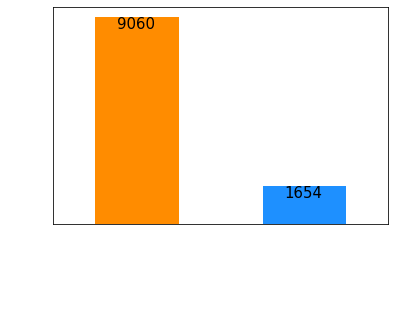

In [53]:
#Graficas
def graficar(valores):
    f, ax = plt.subplots()#(figsize = (12,6))
    valores.value_counts().plot.bar(color=['darkorange', 'dodgerblue']) 
    # Create bars with different colors
    labels = ['No depresivo', 'Depresivo'] 
    ax.set_ylabel('# Tweets')
    ax.set_xlabel('Sentimiento')
    #ax.set_title('clases')
    plt.xticks(ax.get_xticks(), labels, rotation=50)  
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')
    ax.tick_params(axis='both', colors='white')
    for p in ax.patches: #añdir la cantidad en las barras
        ax.annotate(
            p.get_height(), xy=(p.get_x() + 0.13, p.get_height() - 500), fontsize=15
        )
    plt.show()
    
graficar(tweet_data_df[['sentimiento']])

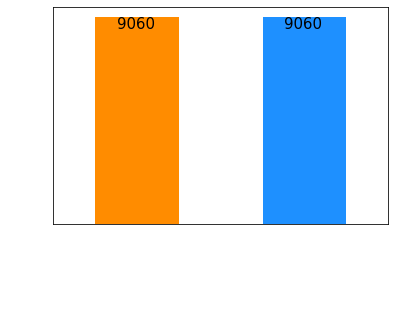

In [54]:
# Datos equilibrados con SMOTE
y_sm_u = pd.DataFrame(y_sm_u,columns=['sentimiento'])
 
tweet_data_balanced_df = pd.concat ([X_sm_u, y_sm_u], axis = 1) # Funciones y etiquetas de re-empalme
graficar(tweet_data_balanced_df[['sentimiento']])